<a href="https://colab.research.google.com/github/tommydb26/datasci112-playlist-generator/blob/main/Final_Project_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading in the Data

In [2]:
import pandas as pd

In [51]:
df = pd.read_csv("/spotify.csv")
df.set_index("track.name", inplace=True)
df

,artists,explicit,id,popularity,danceability,energy,key,loudness,mode,speechiness,...,3,4,5,6,7,8,9,10,11,12
track.name,,,,,,,,,,,,,,,,,,,,,
You,'Miley Cyrus',False,6FAsJDkg4y5JSWP9ZMKlDj,72,0.625,0.5680,11,-5.663,1,0.0324,...,11.539323,-12.510097,23.383751,-16.174316,8.328809,-2.556505,-4.282422,-3.378086,-10.891944,2.584110
Easy (LIke Sunday Morning),'Charles Givings',False,5lnLxpRxCDlqedyWgkBLOh,46,0.584,0.4350,10,-11.736,0,0.0263,...,18.214885,-0.140513,24.040165,-24.511405,-3.840630,-6.885928,-2.012070,-1.377134,-7.607562,1.503317
Baby I'm-a Want You,'Bread',False,7IX2e7pEShera9T1QIMvi7,63,0.613,0.2890,8,-16.529,1,0.0305,...,-12.316468,-12.847976,25.861839,-19.737157,-10.335721,-1.827133,-7.192570,-1.878703,-7.335082,-1.149978
Everything I Own,'Bread',False,52VIdyKqp1pJRSyUQaxKUA,69,0.365,0.3380,2,-13.406,1,0.0322,...,2.044856,-5.262738,31.014177,-18.898640,-13.315408,-2.899277,-7.657300,-0.368305,-6.512232,-6.191590
Apocalypse,'Cigarettes After Sex',False,3AVrVz5rK8Hrqo9YGiVGN5,80,0.369,0.4670,5,-9.018,1,0.0274,...,-16.650313,-22.373093,-1.733394,-29.764263,7.681281,-1.659771,-2.585452,-2.547789,-8.395570,-1.803018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Godspeed,'Frank Ocean',False,34xTFwjPQ1dC6uJmleno7x,71,0.399,0.0969,6,-12.578,1,0.0509,...,5.840797,-22.330447,25.515002,-17.792400,-15.280099,1.405760,-9.261899,-9.622248,-5.609669,2.967544
Writer In The Dark,'Lorde',False,193Dm5SqYy3hTSbuzxbwKc,64,0.325,0.2710,7,-8.069,1,0.0418,...,20.611754,-9.098635,29.450032,-13.189979,-17.050438,-2.646305,-14.314003,-4.656721,-10.477538,-4.439217
Mood Ring,'Lorde',False,6FE9EXi8TYg09hR4xv5PWJ,0,0.709,0.4590,5,-11.193,1,0.0654,...,-33.694737,-19.618376,30.164256,-24.133622,-19.055563,-6.317596,-6.653428,-2.188997,-8.915563,-1.431539


In [5]:
df.columns

Index(['artists', 'explicit', 'id', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12'],
      dtype='object')

# Summary Statistics

I begun by explorting some of the statistics across all of my liked songs.


While most songs were around 4 minutes, there was a strong right skew.

<AxesSubplot:ylabel='Frequency'>

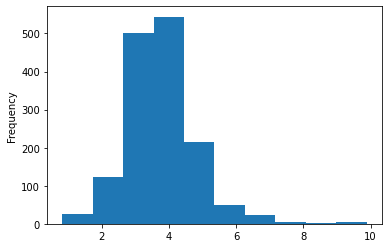

In [ ]:
(df["duration_ms"] / 60000).plot.hist()

Some variables even had near perfect normal distribution.

<AxesSubplot:ylabel='Frequency'>

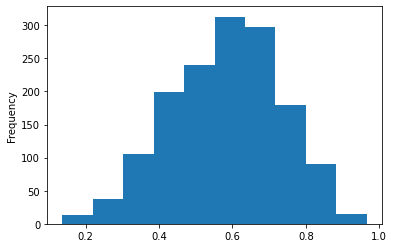

In [ ]:
df["danceability"].plot.hist()

<Axes: ylabel='key'>

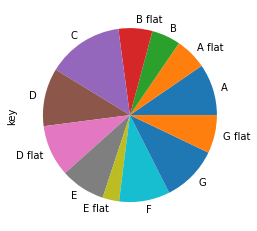

In [ ]:
df["key"].map({
    0: "C",
    1: "D flat",
    2: "D",
    3: "E flat",
    4: "E",
    5: "F",
    6: "G flat",
    7: "G",
    8: "A flat",
    9: "A",
    10: "B flat",
    11: "B"
}).value_counts(normalize=True).sort_index().plot.pie()

This reveals that the key that represents the largest proportion of my liked songs is C while the lowest proportion are in E flat.

# The Issue of Genre

It seems like an important variable missing from my data is the genre of each song; somehow, this information is not included in the audio features or analysis of a song in the Spotify API.

However, within the Spotify user interface, I can filter my liked songs by some tags, such as "Soulful" or "Sad." Some of these are also genres like "R&B" and "Pop." Using a small sample of some of the songs from genre labels, I tried to determine whether this missing information was all that vital.

In [4]:
df_genres = df.loc[["Teenage Dream", "Flowers", "Versace on the Floor", "The Loneliest Time (feat. Rufus Wainwright)", "Lavender Haze", "CUFF IT", "Judas", "Awkward", "Ungodly Hour", "Binz", "I'm Goin' Down", "Every Ghetto, Every City", "PLASTIC OFF THE SOFA", "Give You the World", "Flight 22", "Bad Life (feat. Kali Uchis)", "Poetic Justice", "Retro (Rough)", "PUPPET", "Heartless", "Want Some More"], :]
df_genres["genre"] = ["Pop", "Pop", "Pop", "Pop", "Pop", "Pop", "Pop", "R&B", "R&B", "R&B", "R&B", "R&B", "R&B", "R&B", "R&B", "R&B", "Rap", "Rap", "Rap", "Rap", "Rap"]
df_genres["genre"] = df_genres["genre"].map({
    "Pop": "red",
    "R&B": "blue",
    "Rap": "yellow"
})

df_genres

,artists,explicit,id,popularity,danceability,energy,key,loudness,mode,speechiness,...,4,5,6,7,8,9,10,11,12,genre
track.name,,,,,,,,,,,,,,,,,,,,,
Teenage Dream,'Katy Perry',False,55qBw1900pZKfXJ6Q9A2Lc,63,0.719,0.804,10,-4.581,1,0.0355,...,-0.068517,21.123560,-23.947182,-0.535270,-1.689708,-4.194300,2.449947,-10.566387,-4.972586,red
Flowers,'Miley Cyrus',False,0yLdNVWF3Srea0uzk55zFn,100,0.707,0.681,0,-4.325,1,0.0668,...,-8.425024,14.839168,-24.087912,3.698467,3.479607,-1.385899,2.737479,-9.423368,-3.503299,red
Versace on the Floor,'Bruno Mars',False,0kN8xEmgMW9mh7UmDYHlJP,73,0.578,0.574,2,-6.209,1,0.0454,...,-1.337602,39.177430,-21.206663,2.714917,0.216875,-12.059656,-0.675832,-11.590965,-0.241421,red
The Loneliest Time (feat. Rufus Wainwright),"'Carly Rae Jepsen', 'Rufus Wainwright'",False,1sV6bR42OhPi2PL7ZPHLNi,57,0.686,0.568,2,-6.196,1,0.0568,...,-0.218765,26.206012,-20.832169,-0.668404,3.089642,-10.207129,-0.328429,-8.080619,1.652033,red
Lavender Haze,'Taylor Swift',True,5jQI2r1RdgtuT8S3iG8zFC,85,0.733,0.436,10,-10.489,1,0.0800,...,-22.982994,15.752964,-23.690920,7.610274,0.076753,11.065683,4.241091,-17.397382,-9.566893,red
CUFF IT,'Beyoncé',True,1xzi1Jcr7mEi9K2RfzLOqS,88,0.780,0.689,7,-5.668,1,0.1410,...,-5.850304,19.851521,-13.859059,-8.517770,3.062471,-3.852167,3.928108,-12.654383,3.466029,red
Judas,'Lady Gaga',False,0QkWikH5Z3U0f79T9iuF6c,69,0.661,0.937,10,-3.830,0,0.0744,...,-0.711782,12.143085,-30.950621,12.327373,1.058711,-6.582671,3.246843,-10.819083,0.394720,red
Awkward,'SZA',True,2xZ0zfuDTv5LxLhEgD82PG,76,0.618,0.474,5,-12.097,1,0.0789,...,-9.702505,21.414768,-24.671503,2.168038,-8.507608,-5.632497,-4.208610,-12.865882,-2.143311,blue
Ungodly Hour,'Chloe x Halle',False,4SJRgLsuBKTEBEl9n6JsNu,57,0.704,0.680,2,-6.498,1,0.3150,...,-14.152097,18.081093,-27.880709,2.215387,2.178110,-5.047126,-0.687413,-13.041820,-3.031017,blue


<Axes: xlabel='acousticness', ylabel='mode'>

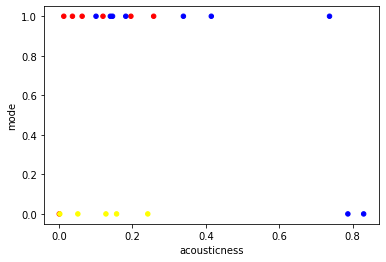

In [43]:
df_genres.plot.scatter(x="acousticness", y="mode", c="genre")

<Axes: xlabel='12', ylabel='energy'>

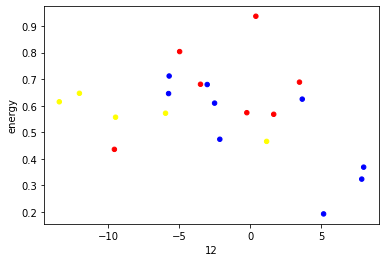

In [41]:
df_genres.plot.scatter(x="12", y="energy", c="genre")

The above scatter plots demonstrate a moderate tendency of the data within a genre to cluster together; most likely, with more variables (which unfortunately we would not be able to visualize) these clusters would become more and more accurate. This would suggest that genre is sort of an aggregate of many of the variables I *do* have. This might justify its absence.

# Exploring Relationships

I will begin by making a correlation matrix of all of the data to find variables that may be correlated.

In [ ]:
correlations = df.corr()
correlations

,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,3,4,5,6,7,8,9,10,11,12
explicit,1.000000,0.152343,0.137242,0.123683,-0.004567,0.161010,-0.115908,0.341824,-0.134204,-0.054275,...,-0.023627,0.130699,0.086904,0.084048,0.062501,0.076587,0.014197,0.123950,-0.333891,-0.111910
popularity,0.152343,1.000000,0.055296,0.139520,0.025991,0.120558,-0.121346,0.045573,-0.126373,0.024571,...,0.047943,0.070779,-0.023372,-0.045276,0.099469,0.016741,0.051518,0.089553,-0.056442,-0.081364
danceability,0.137242,0.055296,1.000000,0.255573,-0.012917,0.228537,-0.087313,0.157596,-0.290608,-0.099481,...,-0.223251,0.481970,0.040858,0.304772,0.110423,-0.047110,-0.064040,0.240601,-0.506800,-0.129339
energy,0.123683,0.139520,0.255573,1.000000,0.012034,0.788791,-0.077629,0.138102,-0.747619,-0.066101,...,0.355738,0.491925,-0.217247,-0.281029,0.430221,0.244712,-0.061719,0.384615,-0.002638,-0.217334
key,-0.004567,0.025991,-0.012917,0.012034,1.000000,-0.001361,-0.121351,0.078777,0.010314,0.008455,...,0.009958,-0.000946,-0.005938,0.024532,-0.024532,-0.029921,0.033415,0.023855,-0.022863,0.021602
loudness,0.161010,0.120558,0.228537,0.788791,-0.001361,1.000000,-0.050727,0.088710,-0.625684,-0.165498,...,0.408569,0.450570,-0.062798,-0.068174,0.368130,0.224543,-0.035911,0.279776,-0.147397,-0.207095
mode,-0.115908,-0.121346,-0.087313,-0.077629,-0.121351,-0.050727,1.000000,-0.152190,0.111739,-0.000438,...,0.014672,-0.112594,-0.016330,0.029481,-0.083012,-0.045922,-0.014818,-0.091253,0.152015,0.055909
speechiness,0.341824,0.045573,0.157596,0.138102,0.078777,0.088710,-0.152190,1.000000,-0.107570,-0.056253,...,-0.084381,0.172934,0.112840,0.259011,-0.014277,0.132411,0.046006,0.142804,-0.475567,-0.084046
acousticness,-0.134204,-0.126373,-0.290608,-0.747619,0.010314,-0.625684,0.111739,-0.107570,1.000000,0.047970,...,-0.190288,-0.442174,0.402230,0.287947,-0.561143,-0.279581,0.070126,-0.422493,0.194880,0.347752
instrumentalness,-0.054275,0.024571,-0.099481,-0.066101,0.008455,-0.165498,-0.000438,-0.056253,0.047970,1.000000,...,-0.059664,-0.008256,-0.157248,-0.186411,0.134068,-0.054011,-0.041758,-0.166752,0.117608,0.096554


One interesting correlation is the relatively strong one (0.341824) between "speechiness" and "explicit"; if I had to guess, I would probably attribute this to rap. Rap is defined by its speech-like cadence and also often includes profanity.

<Axes: xlabel='explicit'>

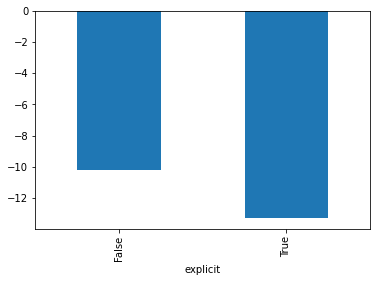

In [52]:
df.groupby("explicit")["11"].mean().plot.bar()

Many surprising correlations arise with the "11" entry of the timbre vector. The visual above shows that its average value is lower for explicit songs; in fact, it is decently negative correlated (-0.334) with explicitness, which is surprising since one is a measure of the sonic quality of a song and the other of its lyrical content. Additionally, it is quite negatively correlated with both "danceability" (-0.507) and "speechiness" (-0.476) despite danceability and speechiness not being very correlated at all. This is depected below as the dots do not look linear at all, but the color darkens as you go up OR right.

<Axes: xlabel='speechiness', ylabel='danceability'>

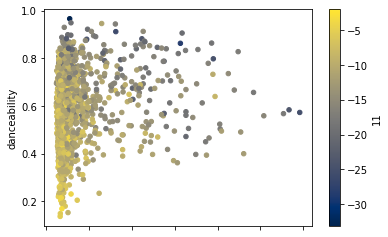

In [ ]:
df.plot.scatter(x="speechiness",
                y="danceability",
                c="11",
                colormap="cividis")

Another is that "acousticness" is negatively correlated (-0.326831) with "valence," which is a measure of the "positivity" of the sound (higher values represent joy, excitement, etc.). This is probably explained by the fact that many acoustic songs, definitely the ones I listen to, are somber in their sound and content.

<Axes: xlabel='acousticness', ylabel='valence'>

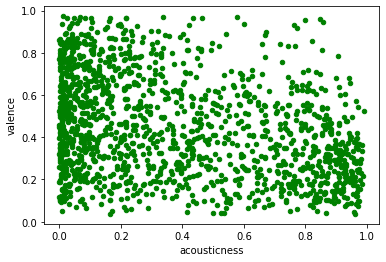

In [55]:
df.plot.scatter(x="acousticness",
                y="valence",
                c="green")

Some unsurprising correlations, on the other hand, are those between danceability and energy and valence — dancing is fun, is joyful and requires an energetic beat.

<AxesSubplot:xlabel='danceability', ylabel='valence'>

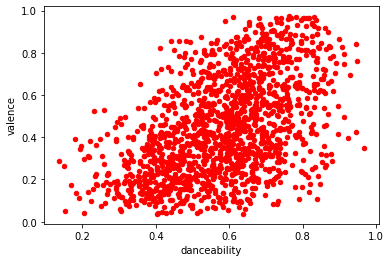

In [ ]:
df.plot.scatter(x="danceability",
                y="valence",
                c="red")

Again, not all that surprising, energy is strongly possitively correlated with loudness (0.789), and both it and loudness are strongly negatively correlated with acousticness, since the color darkens as you move up and right. This relationship will probably be a large factor in strictly distinguishing playlists.

<Axes: xlabel='loudness', ylabel='energy'>

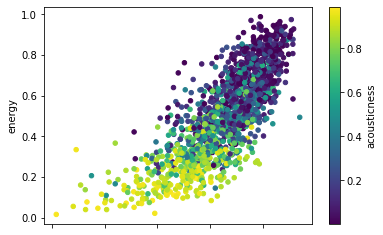

In [21]:
df.plot.scatter(x="loudness",
                y="energy",
                c="acousticness",
                colormap="viridis")

# Exploring Timbre

These correlations also provide us some insight into meanings of the timbre vector designated by the integer columns.

<AxesSubplot:>

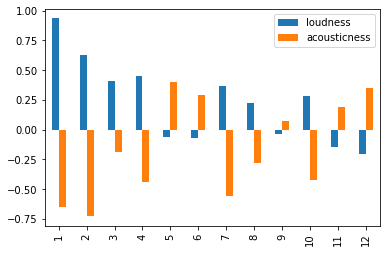

In [ ]:
correlations.loc["1":"12", ["loudness", "acousticness"]].plot.bar()

Above I plotted each entry in the vector's correlation with both loudness and acousticness. Notice that for every aspect of the timbre vector, the correlations with loudness and acousticness are opposite sign and often are equal and opposite in magnitude; it is capturing that loudness and acousticness are very opposite (-0.62). This suggets to me that the timbre vector might alone summarize the auditory qualities of the song — that all of the others might be inherent in the linear combination of it; therefore, I will try one model in which the only training data is this.

The following is a sort of sanity check since the first tempo metric measures the general loudness of a sound.

In [ ]:
print(df["loudness"].corr(df["1"]))

0.934769260235787


The following graph sumarizes the magnitude of different timbre factors over all of my songs; since number 2 embodies the "brightness" of a sound, my songs tend to be slightly "bright." The juxtaposes well with the slightly negative "flattness" score, which number 3 gives.

<Axes: >

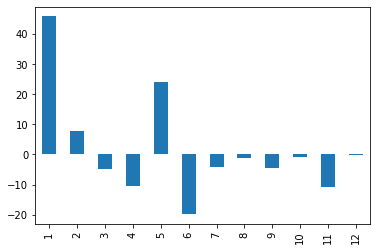

In [56]:
df_timbre = df.loc[:, "1":"12"]
df_timbre.mean().plot.bar()

The following two demonstrate something else about the timbre vector. Most variables remain relatively constant over different time_signatures or keys; this makes sense because most people cannot even identify them by ear (the former only trained musicians and the latter only people with perfect pitch). They are almost completely inconsequential to valence, danceability, acousticness. BUT, for some entries in the timbre vector the time signature or key can drastically change that quality. Consider the two following examples.

<Axes: xlabel='time_signature'>

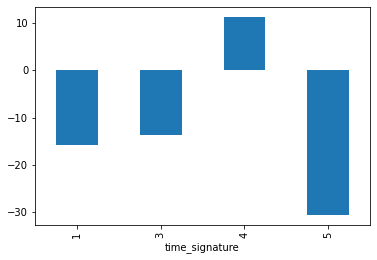

In [ ]:
df.groupby("time_signature")["2"].mean().plot.bar()

<Axes: xlabel='key'>

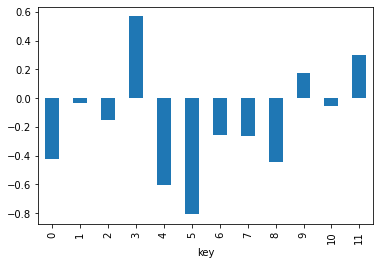

In [ ]:
df.groupby("key")["12"].mean().plot.bar()

# Exploring Tempo

<AxesSubplot:ylabel='Frequency'>

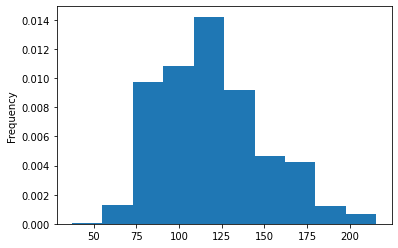

In [ ]:
df["tempo"].plot.hist(density=True)

It appears that almost all of my liked songs have tempo greater than or equal to 75 bpm. Let's see the ones that don't. We might expect these to be in the same playlist!

In [ ]:
df[df["tempo"] < 75]

,artists,explicit,id,popularity,danceability,energy,key,loudness,mode,speechiness,...,3,4,5,6,7,8,9,10,11,12
track.name,,,,,,,,,,,,,,,,,,,,,
Evergreen,'Yebba',False,4UuwnKoOKWYYnerZKZMtvD,54,0.618,0.3210,2,-7.396,1,0.0543,...,5.428883,11.828029,39.092398,-17.540847,-3.318252,2.123513,-0.254721,3.300617,-8.680506,-2.657888
Us and Them,'Pink Floyd',False,1TKTiKp3zbNgrBH2IwSwIx,65,0.357,0.3020,2,-14.526,1,0.0303,...,6.287371,-18.215117,15.739202,-23.578671,-10.598600,-3.785914,-13.508206,-9.071235,-3.699637,0.823229
Carolina in My Mind,'James Taylor',False,2T5Ch09nefwckOu5NQvjIk,64,0.579,0.2670,4,-15.110,1,0.0348,...,-20.963753,-14.991464,-4.221990,-18.791335,5.445204,2.028899,-9.644065,0.019969,-11.019733,3.511817
Moondance - 2013 Remaster,'Van Morrison',False,6KHNMPZTSif1zFbFKErpNU,47,0.606,0.2820,9,-12.207,0,0.0339,...,-13.714674,-14.700523,6.165690,-8.510111,6.566155,4.660741,-0.624601,4.022144,-17.171373,8.639729
Rainy Days And Mondays,'Carpenters',False,5cbZDpFu1hTwaU7hDQpf13,59,0.351,0.2350,10,-11.513,1,0.0323,...,20.435576,-14.575410,35.419233,-19.273722,-19.643940,-1.106281,3.116680,-1.310095,-7.141020,2.936588
Still Crazy After All These Years,'Paul Simon',False,3gIBSlXYIN1mru35l4LWPB,56,0.267,0.2520,7,-11.687,1,0.0351,...,-7.581957,-20.968032,36.994657,-24.508366,-11.743937,-6.277388,5.095779,-1.233443,-7.419386,1.415641
Fake Plastic Trees,'Radiohead',False,73CKjW3vsUXRpy3NnX4H7F,69,0.463,0.2290,2,-12.592,1,0.0297,...,-29.015363,-25.597050,12.426930,-26.584468,2.494711,-8.341403,-0.444242,-2.665655,-6.599379,5.491899
Devil Town,'Bright Eyes',False,4eJ6pWefeAQjpMKTY6bwXV,40,0.197,0.5300,5,-8.456,1,0.0404,...,26.730442,-14.568089,5.032833,-19.686109,-17.825595,0.794451,-3.629695,5.479976,-8.165635,-0.819362
You're the Inspiration - 2006 Remaster,'Chicago',False,36lkJSDyMEZoWTqtRj8Q8q,70,0.583,0.6020,11,-6.364,1,0.0274,...,22.435231,-3.639613,20.870266,-15.200361,-0.610337,-1.888506,-6.929861,-2.513081,-9.849770,-2.496445


Exploring the opposite end of the spectrum below reveals that tempo isn't exactly a measure of speed, which I had intended to consider it. Most of these songs, which according to this tempo would be the fastest of the bunch, are actually particularly slow songs.

In [22]:
df[df["tempo"] > 200]

,artists,explicit,id,popularity,danceability,energy,key,loudness,mode,speechiness,...,3,4,5,6,7,8,9,10,11,12
track.name,,,,,,,,,,,,,,,,,,,,,
Aeroplane,'Greer',True,0KZsNuPlsR2670u3uHJaza,47,0.254,0.6510,9,-5.982,1,0.0445,...,16.152207,-18.123691,13.938088,-25.948471,-13.264798,-2.737801,1.505284,1.160718,-5.860541,-7.798539
Real Love Baby,'Father John Misty',False,0Z57YWES04xGh3AImDz6Qr,68,0.417,0.6860,7,-6.484,1,0.0373,...,28.305163,-6.739007,-5.254603,-18.134557,13.102757,7.983873,-8.207064,-3.686983,-9.906320,-13.171388
Fall With Me,'The Wild Reeds',False,5E1duMn3Gz5CtPeEF8Vty2,49,0.305,0.2840,4,-8.902,1,0.0403,...,8.310410,-22.920481,37.613850,-19.059184,-23.902281,-0.638016,12.062019,4.645496,-7.616832,-5.165235
Amandla's Interlude,'Steve Lacy',False,13HOw2SzGkOKUMV35K6yhs,47,0.182,0.2490,0,-11.835,1,0.0395,...,36.632855,-7.444740,22.568149,-24.776931,1.513368,1.166242,-14.127439,-8.008103,-2.173724,7.420383
Bubble Gum,'Clairo',False,3zksbXteOCeSusJ5Xltr3t,75,0.509,0.0167,9,-24.639,1,0.1150,...,-63.385122,-39.835867,23.235865,-1.011537,-40.047386,-7.265459,2.515112,9.744876,-15.791845,8.790569
"Kokomo, IN",'Japanese Breakfast',False,0O4sIQ728ugLlwBVaxF8UM,55,0.415,0.6650,9,-6.374,1,0.0291,...,1.745860,-11.464419,33.376557,-28.580716,5.641081,-3.800874,-2.953187,-0.406001,-10.116216,0.127621
Hell N Back,'Bakar',True,3NRql0A1Ef4RCvT473iqgD,76,0.584,0.6840,10,-4.314,0,0.5670,...,4.942685,1.569798,10.302985,1.959964,18.303041,4.101451,-6.672807,-10.596013,-23.806605,2.934033
It Hurt So Bad,'Susan Tedeschi',False,6Wo4NzqOlmk774LQ7wDeTq,37,0.396,0.4050,9,-8.204,1,0.0440,...,28.618963,5.629299,7.551604,-16.693506,6.284240,7.733184,-6.873227,-1.677751,-12.676732,-0.502247
Lights,'Journey',False,7EHmKkyAr6MZv5Y2FdZbXw,63,0.193,0.4980,7,-9.901,1,0.0381,...,-6.492037,-25.773113,-0.333010,-22.940848,-3.147854,0.716730,-8.133196,-3.709142,-6.418210,11.399121


Upon further thinking this is because it depends how you count a song; for slower songs, you often notate them, and thus count, in smaller subdivisions because otherwise the beats would be too infrequent. This might impact whether or not using tempo in the training data produces a good model.

# Exploring Popularity

<AxesSubplot:ylabel='Frequency'>

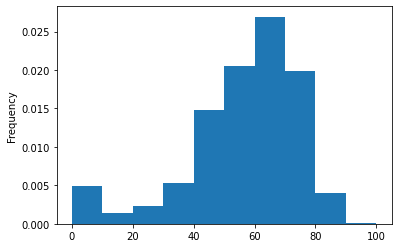

In [ ]:
df["popularity"].plot.hist(density=True)

I was suspicious of the high frequency of the left-most bar, so I decided to filter the data for tracks with popularity equal to 0.

In [ ]:
df[df["popularity"] == 0]

,artists,explicit,id,popularity,danceability,energy,key,loudness,mode,speechiness,...,3,4,5,6,7,8,9,10,11,12
track.name,,,,,,,,,,,,,,,,,,,,,
As We Go Along,'The Monkees',False,2uLu3SMj2w5M8W1goGWLPP,0,0.484,0.3080,3,-12.595,1,0.0326,...,-14.737675,-17.049523,9.287390,-13.031662,-17.721993,-13.969198,2.412866,-2.974849,-8.551624,11.272197
St. Tropez Party Girl,'EVE !',True,034fAH6pxP5rFNAFOLcSO6,0,0.558,0.6470,3,-8.605,0,0.0805,...,-53.069129,-28.562128,15.622559,-21.551260,-3.837531,-4.446522,17.437217,9.929173,-19.059562,1.374843
Renegade (feat. Taylor Swift),"'Big Red Machine', 'Taylor Swift'",True,1aU1wpYBSpP0M6IiihY5Ue,0,0.532,0.7080,0,-8.121,1,0.0505,...,-18.564149,-17.286371,24.402653,-31.941139,-3.390072,-8.100205,1.415294,1.081771,-7.686424,-2.737328
Woodland,'The Paper Kites',False,431qZaQAJuIolwBrlDa6Yg,0,0.435,0.5230,0,-9.502,1,0.0410,...,-13.473767,-19.344197,20.766995,-25.702597,-14.321409,-3.604801,-2.933901,1.136914,-6.739707,3.782584
Kyoto,'Phoebe Bridgers',False,49UDOG8DoBajXTJSTqfRMg,0,0.599,0.7420,11,-6.886,1,0.0419,...,-1.077539,-12.483449,8.037172,-30.177735,7.204293,-0.074882,-5.085687,-4.977754,-5.905904,-1.577020
At Last,'Etta James',False,1hXIdXjAI4nWz4qnJ28iO2,0,0.137,0.2900,5,-13.030,1,0.0319,...,39.671252,-10.544935,22.771195,-23.619216,-23.309688,-3.726837,-1.199069,0.202734,-5.260419,6.445711
Sunday Morning,'Maroon 5',False,4T5cqerbDXueYSVfXkIITo,0,0.604,0.7610,0,-5.227,1,0.0468,...,-0.910448,-2.974149,31.387832,-29.035194,2.052254,2.294722,-7.779183,0.609767,-9.777477,-2.768423
Moonlight,'Ariana Grande',False,4TZdeM7zelZGz6JPrXSEZ1,0,0.633,0.4120,9,-7.339,1,0.0284,...,17.877466,-8.071587,39.165504,-18.575520,-13.810618,-5.371193,3.724682,-0.159584,-11.811991,-7.817503
I Don't Care,'Ariana Grande',True,6j4w8O8gEseBUZTOo8vYMK,0,0.591,0.4030,0,-8.284,1,0.0431,...,6.327849,-15.875233,31.134286,-18.899245,-13.824991,-3.945651,-1.910444,-4.542852,-9.507896,6.136991


The tracks that this included made me even more suspicious. Some make sense, such as the two Joni Mitchell songs which are not even available anymore on spotify, but others — the inclusion of *any* song by Taylor Swift or Ariana Grande — make me almost certain that this popularity metric is somehow buggy.

In [ ]:
df[df["popularity"] > 85]

,artists,explicit,id,popularity,danceability,energy,key,loudness,mode,speechiness,...,3,4,5,6,7,8,9,10,11,12
track.name,,,,,,,,,,,,,,,,,,,,,
Flowers,'Miley Cyrus',False,0yLdNVWF3Srea0uzk55zFn,100,0.707,0.681,0,-4.325,1,0.0668,...,-0.229956,-8.425024,14.839168,-24.087912,3.698467,3.479607,-1.385899,2.737479,-9.423368,-3.503299
Nobody Gets Me,'SZA',True,5Y35SjAfXjjG0sFQ3KOxmm,86,0.358,0.284,7,-8.285,1,0.0285,...,33.804453,-14.367110,35.742663,-14.390449,-5.669527,-1.427196,-6.401531,-3.752929,-8.405433,2.679743
Kill Bill,'SZA',False,3OHfY25tqY28d16oZczHc8,92,0.644,0.728,8,-5.750,1,0.0351,...,16.327256,-4.105102,15.527072,-21.203735,19.005209,-2.250505,-3.895449,-4.097046,-8.144393,2.724323
CUFF IT,'Beyoncé',True,1xzi1Jcr7mEi9K2RfzLOqS,88,0.780,0.689,7,-5.668,1,0.1410,...,-8.721141,-5.850304,19.851521,-13.859059,-8.517770,3.062471,-3.852167,3.928108,-12.654383,3.466029
As It Was,'Harry Styles',False,4Dvkj6JhhA12EX05fT7y2e,89,0.520,0.731,6,-5.338,0,0.0557,...,4.540609,-10.300668,25.326417,-26.472499,-3.351350,-7.143290,-2.276293,-5.537735,-9.133284,-4.080618
Late Night Talking,'Harry Styles',False,1qEmFfgcLObUfQm0j1W2CK,87,0.714,0.728,10,-4.595,1,0.0468,...,-4.600008,-6.687242,39.907909,-24.288716,-8.517383,-4.528800,-3.005291,1.411022,-12.715476,0.560765
Yellow,'Coldplay',False,3AJwUDP919kvQ9QcozQPxg,86,0.429,0.661,11,-7.227,1,0.0281,...,8.245924,-10.881489,-2.540517,-25.850598,-9.974627,-1.620871,0.904289,1.697208,-7.160694,-7.148491
Die For You,'The Weeknd',False,2Ch7LmS7r2Gy2kc64wv3Bz,86,0.582,0.525,1,-7.163,0,0.0627,...,-3.559358,-15.524077,35.990081,-23.020525,1.533420,-2.119914,-0.371846,-2.748482,-12.962374,-3.697929


The very popular songs, however, seemed to more match my expectations.

Overall, this demonstration has made me skeptical of the popularity metric, so I plan to train at least one model for which popularity is disregarded.